# Artist identification using CNNs


The goal of this repository is to train a Convolutional Neural Networks (CNNs) to identify the artist of a painting as accurately and precisely as possible.



In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data import TensorDataset

import torchvision.datasets as dset
import torchvision.models as models
import torchvision.transforms as T

import torchnet as tnt
from torchnet.meter import ConfusionMeter

import numpy as np
import timeit


### Data
In this repository, we'll use the data from [Kaggle](https://www.kaggle.com/c/painter-by-numbers/data). This dataset is based on the WikiArt dataset and contains roughly 100,000 paintings by 2,300 artists spanning a variety of time periods and styles. As this dataset is too big for a PoC and many artists have fewer than 50 paintings we've decided to only keep the artitsts with more than 300 paintings in the dataset.

In [3]:
data_info = pd.read_csv('all_data_info.csv', sep=",")
print("The number of painting is {}.".format(data_info.shape[0]))

The number of painting is 103250.


In [4]:
data_info.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


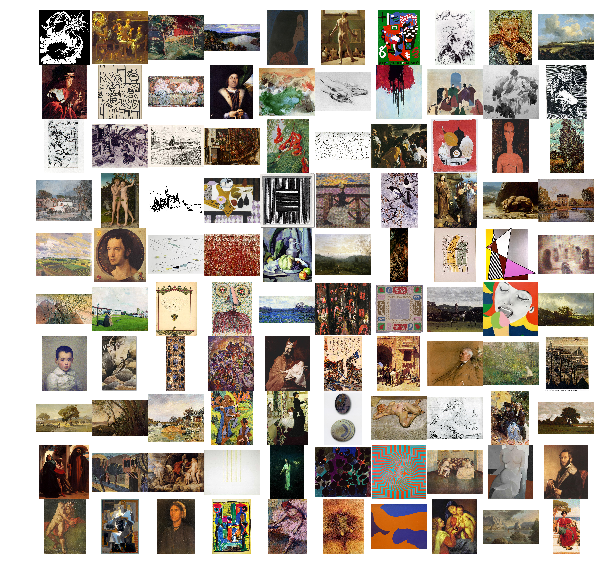

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
import random
import cv2
import os, glob

train_files = [f for f in glob.glob("N:/Semester_Project/Data/train_1/*")] #finds all the pathnames


i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in train_files[:100]:
    im = cv2.imread(l)
    plt.subplot(10, 10, i_+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

##### Let's look closer at the dataset
- style
- artist
- etc


In [6]:
train_files[0]

'N:/Semester_Project/Data/train_1\\1.jpg'

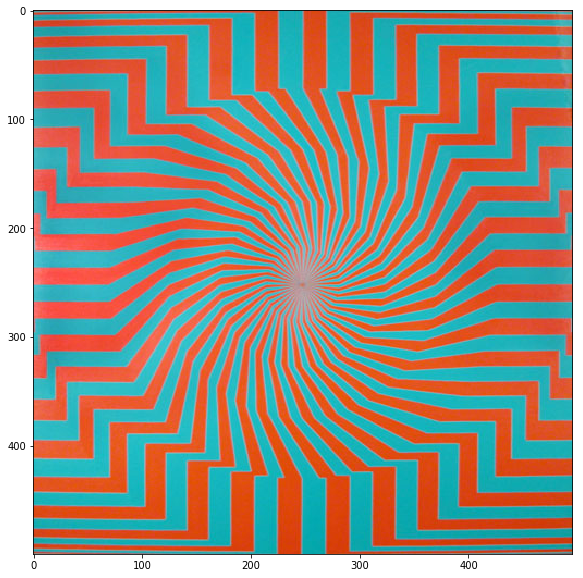

In [13]:
plt.imshow(cv2.cvtColor(cv2.imread(train_files[86]), cv2.COLOR_BGR2RGB))
plt.show()


In [6]:
print("The number of distinct artist is {} .".format(data_info['artist'].value_counts().describe()[0]))
data_count = data_info['artist'].value_counts().rename("value_count")
data_count[data_count > 300].describe()[0]
print("The number of artists with more than 300 paintings in the dataset is {}"
                             .format(data_count[data_count > 300].describe()[0]))

The number of distinct artist is 2319.0 .
The number of artists with more than 300 paintings in the dataset is 57.0


As we said before, we want to keep only the artists with more than 300 painting:


In [17]:
def get_artists(data,threshold):
    data_temp = data['artist'].value_counts()
    artists =  data_temp[ data_temp >= threshold].index.tolist()
    print("Number of artists with more than {0}: {1}".format(threshold,len(artists)))
    return artists


In [19]:
Artists = get_artists(data_info,300)

Number of artists with more than 300: 57


Now we have the list of the artists we can filter our dataset:

In [ ]:
data_info[Artists.str.startswith(a, na=False)].sample(n=num_samples, random_state=seed)

### Preprocessing and Data Augmentation

First, we're going to zero-center the images and normalize them. Next, we'll take a 224x224 crop of each input image. While training the network, we randomly horizontally flip the input image with a 50% probability and then take a crop of a random section of the painting. 

### CNN

## References
- [Artist Identification with Convolutional Neural Networks](http://cs231n.stanford.edu/reports/2017/pdfs/406.pdf)